In [1]:
from cybergis_compute_client import CyberGISCompute

cybergis = CyberGISCompute(url="cgjobsup-dev.cigi.illinois.edu", port=3030, protocol='HTTP', isJupyter=True)

In [2]:
cybergis.list_hpc()

hpc,ip,port,is_community_account
keeling_community,keeling.earth.illinois.edu,22,True
bridges_community,bridges2.psc.edu,22,True
hadoop,hadoop01.cigi.illinois.edu,50022,False


In [3]:
cybergis.list_maintainer()

maintainer,hpc,default_hpc,job_pool_capacity,executable_folder->from_user,executable_folder->must_have
hello_world_singularity,['keeling_community'],keeling_community,5,False,not specified
community_contribution,"['keeling_community', 'bridges_community']",keeling_community,5,True,not specified


In [4]:
cybergis.list_git()

link,name,container,repository,commit
git://spatial_access_covid-19,COVID-19 spatial accessibility,cybergisx-0.4,https://github.com/cybergis/cybergis-compute-spatial-access-covid-19.git,
git://hello_world,hello world,python,https://github.com/cybergis/cybergis-compute-hello-world.git,
git://fireabm,hello FireABM,cybergisx-0.4,https://github.com/cybergis/cybergis-compute-fireabm.git,
git://bridge_hello_world,hello world,python,https://github.com/cybergis/CyberGIS-Compute-Bridges-2.git,


In [5]:
# all parameters are optional
# slurm = {
#    walltime?: string -> --time
#    num_of_node?: number -> --nodes
#    num_of_task?: number -> --ntasks
#    cpu_per_task?: number -> --cpus-per-task
#    memory?: string -> --mem
#    memory_per_cpu?: string -> --mem-per-cpu
#    memory_per_gpu?: string -> --mem-per-gpu
#    gpus?: number -> --gpus
#    gpus_per_node?: number | string -> --gpus-per-node
#    gpus_per_socket?: number | string -> --gpus-per-socket
#    gpus_per_task?: number | string -> --gpus-per-task
#    partition?: string -> --partition
#    mail_type?: string[] -> --mail-type
#    mail_user?: string[] -> --mail-user
#    modules?: string[] -> module load [module_name]
# }

slurm = {
    "num_of_task": 4,
    "walltime": "20:00",
}


demo_job = cybergis.create_job('community_contribution')

📃 created constructor file [job_constructor_1630511030IIoDG.json]


In [6]:
demo_job.set(executableFolder="git://spatial_access_covid-19", slurm=slurm)

{'param': {}, 'env': {}, 'slurm': {'num_of_task': 4, 'walltime': '20:00'}, 'executableFolder': 'git://spatial_access_covid-19'}


In [7]:
demo_job.submit()

✅ job submitted


id,maintainer,hpc,executableFolder,dataFolder,resultFolder,param,slurm
2021-09-01T10:43:50.000Z,git://spatial_access_covid-19,"{""num_of_task"": 4, ""walltime"": ""20:00""}",{},community_contribution,1630511030IIoDG,,keeling_community


In [8]:
demo_job.events(liveOutput=True)

📮 Job ID: 1630511030IIoDG
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


types,message,time
JOB_QUEUED,"job [1630511030IIoDG] is queued, waiting for registration",2021-09-01T10:43:50.000Z
JOB_REGISTERED,"job [1630511030IIoDG] is registered with the supervisor, waiting for initialization",2021-09-01T10:43:53.000Z
SLURM_UPLOAD,uploading files,2021-09-01T10:44:00.000Z
SSH_UNZIP,unzipping /data/keeling/a/cigi-gisolve/scratch/dev/1630511030IIoDG/executable.zip to /data/keeling/a/cigi-gisolve/scratch/dev/1630511030IIoDG/executable,2021-09-01T10:44:00.000Z
SSH_RM,removing /data/keeling/a/cigi-gisolve/scratch/dev/1630511030IIoDG/executable.zip,2021-09-01T10:44:00.000Z
SSH_CREATE_FILE,create file to /data/keeling/a/cigi-gisolve/scratch/dev/1630511030IIoDG/executable/job.json,2021-09-01T10:44:00.000Z
SLURM_MKDIR_RESULT,creating result folder,2021-09-01T10:44:00.000Z
SLURM_SUBMIT,submitting slurm job,2021-09-01T10:44:00.000Z
JOB_INIT,"job [1630511030IIoDG] is initialized, waiting for job completion",2021-09-01T10:44:00.000Z
SSH_ZIP,zipping /data/keeling/a/cigi-gisolve/scratch/dev/1630511030IIoDG/result to /data/keeling/a/cigi-gisolve/scratch/dev/1630511030IIoDG/result.zip,2021-09-01T10:55:47.000Z


In [9]:
demo_job.logs(liveOutput=True)

📮 Job ID: 1630511030IIoDG
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


message,time
running setup /1630511030IIoDG/result /1630511030IIoDG/result /1630511030IIoDG/result /1630511030IIoDG/result Removed 108 nodes (0.0038%) from the OSMNX network Number of nodes: 28433 Number of edges: 75895 Removed 108 nodes (0.0038%) from the OSMNX network Number of nodes: 28433 Removed 108 nodes (0.0038%) from the OSMNX network Number of nodes: 28433 Number of edges: 75895 Number of edges: 75895 Removed 108 nodes (0.0038%) from the OSMNX network Number of nodes: 28433 Number of edges: 75895 ho...[download for full log],2021-09-01T10:55:47.000Z
"UID: readonly variable UID: readonly variable UID: readonly variable UID: readonly variable UID: readonly variable 0%| | 0/75895 [00:00<?, ?it/s] 0%| | 0/75895 [00:00<?, ?it/s] 59%|█████▉ | 44662/75895 [00:00<00:00, 446617.23it/s] 0%| | 0/75895 [00:00<?, ?it/s] 100%|██████████| 75895/75895 [00:00<00:00, 452793.13it/s] 58%|█████▊ | 43802/75895 [00:00<00:00, 438013.11it/s] 57%|█████▋ | 43133/75895 [00:00<00:00, 431308.82it/s] 100%|██████████| 75895/758...[download for full log]",2021-09-01T10:55:47.000Z


In [10]:
result_zip = demo_job.downloadResultFolder('./')

file successfully downloaded under: ./1630511033HuiN.zip


In [11]:
import os, shutil, zipfile
extract_results_to = "access_result/"
if os.path.exists(extract_results_to):
    shutil.rmtree(extract_results_to)
os.mkdir(extract_results_to)
with zipfile.ZipFile(result_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_results_to)

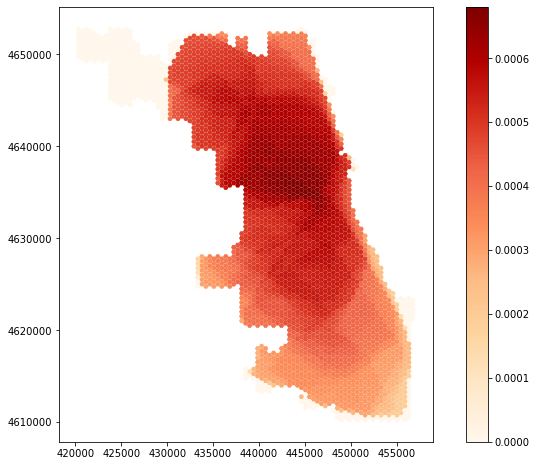

In [12]:
import geopandas as gpd
result = gpd.read_file(os.path.join(extract_results_to, "result.geojson"))
result.plot(column="hospital_vents", cmap="OrRd", legend=True, figsize=(12,8))